In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "data/imdb_top_1000.csv"

In [4]:
df = pd.read_csv(path)

In [7]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [102]:
unique_generes_count = df['Genre'].nunique()
genre_ratings = df.groupby('Genre')['IMDB_Rating'].mean().reset_index()

In [105]:
genres = genre_ratings['Genre']
ratings = genre_ratings['IMDB_Rating']

In [106]:
result = {
    'Genre': genres,
    'Avarage_rating': ratings,
    'Count': unique_generes_count
}

In [107]:
# result

In [108]:
result_df = pd.DataFrame(result)
result_df

,Genre,Avarage_rating,Count
0,"Action, Adventure",8.180000,202
1,"Action, Adventure, Biography",7.900000,202
2,"Action, Adventure, Comedy",7.910000,202
3,"Action, Adventure, Crime",7.600000,202
4,"Action, Adventure, Drama",8.150000,202
...,...,...,...
197,"Mystery, Romance, Thriller",8.300000,202
198,"Mystery, Sci-Fi, Thriller",7.800000,202
199,"Mystery, Thriller",7.977778,202
200,Thriller,7.800000,202


In [109]:
result_df.to_csv('result.csv', index=False)

In [110]:
res = pd.read_csv('result.csv')
res

,Genre,Avarage_rating,Count
0,"Action, Adventure",8.180000,202
1,"Action, Adventure, Biography",7.900000,202
2,"Action, Adventure, Comedy",7.910000,202
3,"Action, Adventure, Crime",7.600000,202
4,"Action, Adventure, Drama",8.150000,202
...,...,...,...
197,"Mystery, Romance, Thriller",8.300000,202
198,"Mystery, Sci-Fi, Thriller",7.800000,202
199,"Mystery, Thriller",7.977778,202
200,Thriller,7.800000,202


In [111]:
# let me take 20 generes
categories = genres[:15]

In [112]:
categories

0                Action, Adventure
1     Action, Adventure, Biography
2        Action, Adventure, Comedy
3         Action, Adventure, Crime
4         Action, Adventure, Drama
5        Action, Adventure, Family
6       Action, Adventure, Fantasy
7       Action, Adventure, History
8        Action, Adventure, Horror
9       Action, Adventure, Mystery
10      Action, Adventure, Romance
11       Action, Adventure, Sci-Fi
12     Action, Adventure, Thriller
13          Action, Adventure, War
14      Action, Adventure, Western
Name: Genre, dtype: object

In [113]:
values = [df['Genre'].value_counts()[genre] for genre in categories]

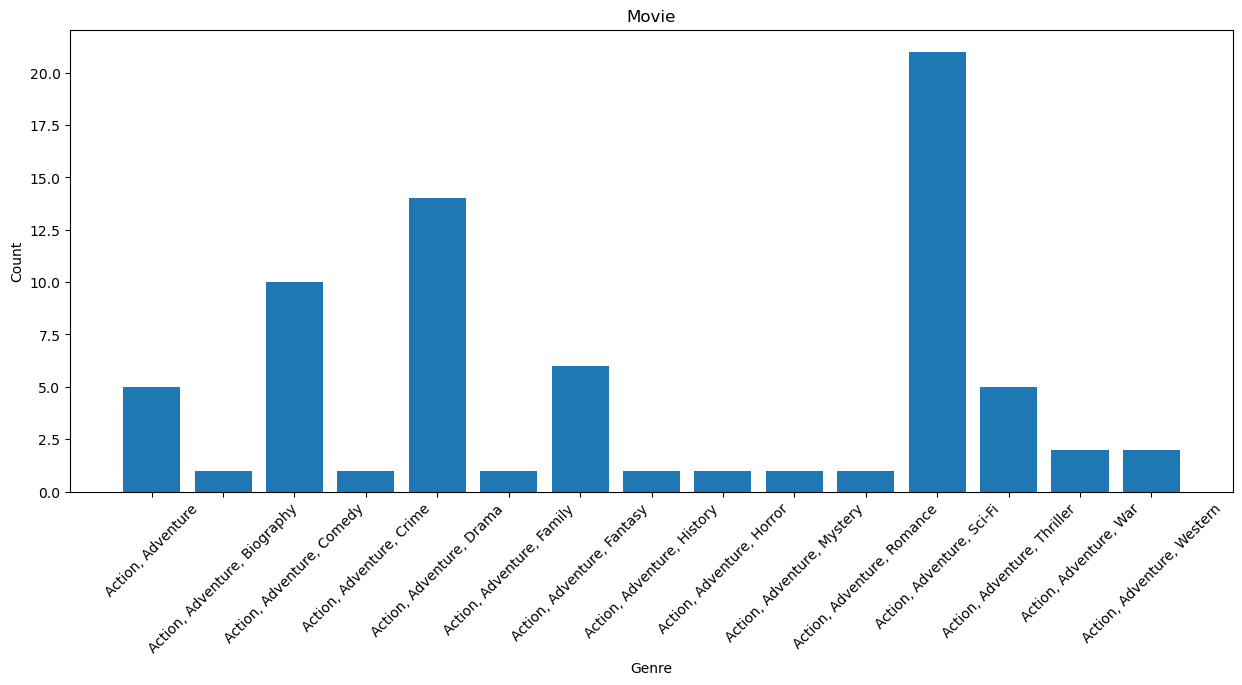

In [114]:
plt.figure(figsize=(15, 6))
plt.bar(categories, values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Movie')
plt.xticks(rotation=45)

plt.show()

In [118]:
movies_per_year = df['Released_Year'].value_counts().nlargest(20)
movies_per_year

2014    32
2004    31
2009    29
2013    28
2016    28
2001    27
2007    26
2006    26
2015    25
2012    24
2010    23
1993    23
2019    23
2003    22
2017    22
2008    21
2002    19
1997    19
1995    19
2018    19
Name: Released_Year, dtype: int64

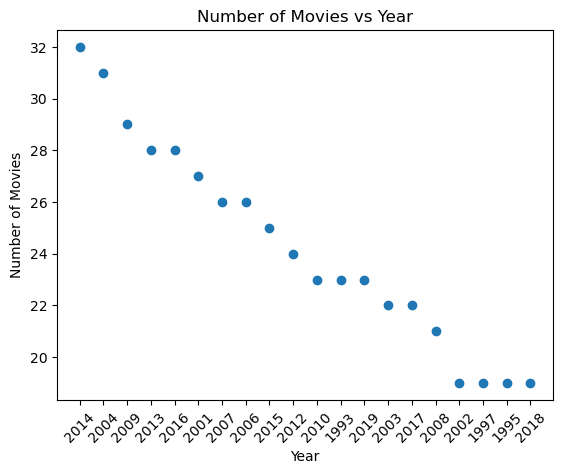

In [120]:
plt.scatter(movies_per_year.index, movies_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies vs Year')
plt.xticks(rotation=45)
plt.show()